<a href="https://colab.research.google.com/github/DevP-ai/Machine-Learning/blob/master/Assignment_2(Polynomial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X=6*np.random.rand(200,1)-3

In [10]:
import pandas as pd
pd.DataFrame(X).shape

(200, 1)

In [11]:
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

In [13]:
pd.DataFrame(y).shape

(200, 1)

# y = 0.8x^2 + 0.9x + 2

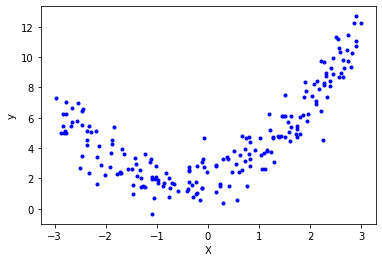

In [14]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression,SGDRegressor
# Applying linear regression
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.21411454521053752

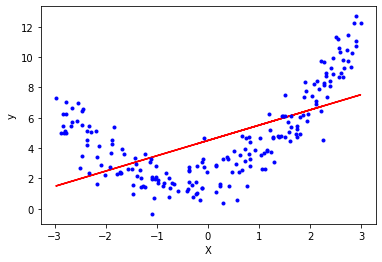

In [24]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [38]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [39]:
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [40]:
print(X_train[0])
print(X_train_trans[0])

[-0.22755302]
[ 1.         -0.22755302  0.05178038]


In [41]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_test_trans)

In [43]:
r2_score(y_test,y_pred)

0.8060586288346243

In [44]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.86690679 0.81369981]]
[2.02174738]


In [45]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

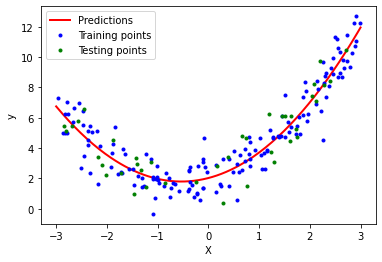

In [46]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


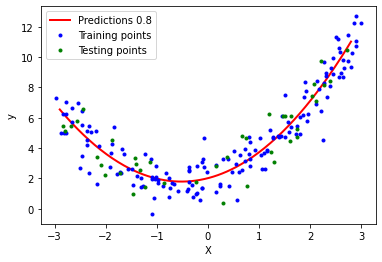

In [47]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()